In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Explore data

In [4]:
marketing = pd.read_csv('marketing.csv')

In [6]:
marketing.head(5)
marketing.tail(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True
10036,a100007294,1/6/18,Facebook,control,False,German,German,0-18 years,1/17/18,NaN,Email,True


In [25]:
marketing.columns
for c in marketing.columns:
    print(str(c) + "-"*5 + str(marketing[c].dtype))

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code'],
      dtype='object')

user_id-----object
date_served-----object
marketing_channel-----object
variant-----object
converted-----object
language_displayed-----object
language_preferred-----object
age_group-----object
date_subscribed-----object
date_canceled-----object
subscribing_channel-----object
is_retained-----object
channel_code-----float64


### Mapping values in column

In [13]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel']\
                            .map(channel_dict)

### Convert string type to date time with date columns, and convert to day of week

In [26]:
### Convert string type to date time with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])

marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

### 2. Check how many users by channel and how many users are seeing ads each day

In [33]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

Text(0.5, 1.0, 'Daily users')

Text(0, 0.5, 'Number of users')

(array([17532, 17562]), <a list of 2 Text xticklabel objects>)

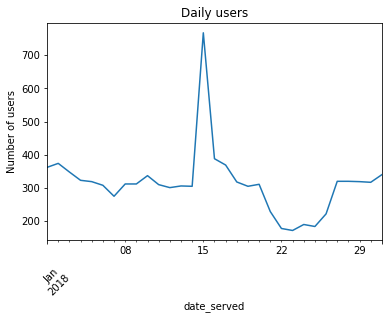

In [34]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

### 3. Conversion rate and retention rate

You can create high conversion rate by giving users a free trial, but have a low retention rate once users are charged when using services => this might be a bad thing

### 3a. Conversion rate

- Compute conversion rate to evaluate how a marketing campaign performed 

- Visualize data with type is Series

- Visualize data with type is DataFrame


In [35]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [69]:
# User-defined conversion rate function
def conversion_rate(dataframe, column_names):  #column_names: might be a list
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

age_group_conv = conversion_rate(marketing,['date_served','age_group'])

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


Text(0.5, 1.0, 'Daily Conversion Rate')

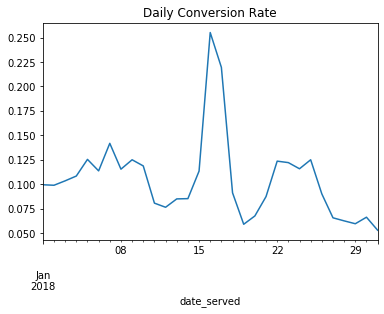

In [53]:
## Plot conversion by day 

# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rates = subscribers/total

print(daily_conversion_rates)

daily_conversion_rates.plot()
plt.title('Daily Conversion Rate')

Text(0.5, 1.0, 'Daily conversion rate\n')

Text(0, 0.5, 'Conversion rate (%)')

Text(0.5, 0, 'Date')

(0, 0.26526531231049116)

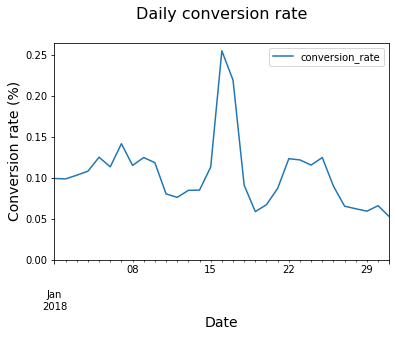

In [55]:
## Because type(daily_conversion_rate) is Series, we can turn to DataFrame

# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate', kind = 'line')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### 3b. Retention rate to see how many people remained subscribed from total number of people who converted

In [36]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


### 4. Determine how effective the campaign 

- Determine how effective the campaign was on converting English speakers

- Determine how effective the campaign was by language group

- Visualize conversion rate by language group when data is Series type

In [40]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()
print(total)

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()
print(subscribers)

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

7169
926
English speaker conversion rate: 12.92 %


In [48]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

type(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


pandas.core.series.Series

Text(0.5, 1.0, 'Conversion rate by language\n')

Text(0.5, 0, 'Language')

Text(0, 0.5, 'Conversion rate (%)')

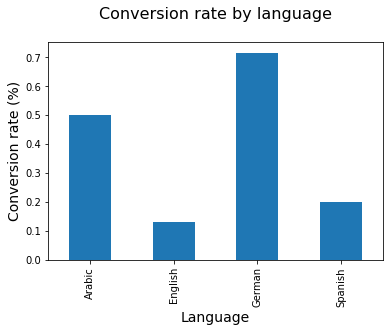

In [46]:
## Visualize conversion rate by language
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

### 5. Determine if marketing channels are serving specific age demographics

### 5a. Number of unique users by channel and age demographics

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118  


Text(0.5, 1.0, 'Marketing channels by age group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Users')

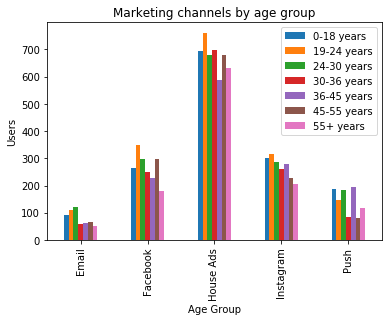

In [58]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
print(channel_age_df)

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### 5b. Retention rate for campaigns

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                6
                 House Ads               6
                 Instagram               3
                 Push                    2
Name: user_id, Length: 155, dtype: int64
--------------------------------------------------
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                5
                 

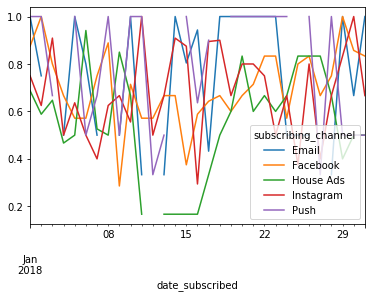

In [68]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()
print(retention_total)

retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()
print("-"*50)
print(retention_subs)

retention_rate = retention_subs/retention_total

retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))
print(retention_rate_df.head(5))

retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
# plt.title('Retention Rate by Subscribing Channel')
# plt.xlabel('Date Subscribed')
# plt.ylabel('Retention Rate (%)')
# plt.legend(loc = 'upper right'
# , labels = retention_rate_df.columns.values)
# plt.show()

### 6. Because marketing channel "House Ads" has the most users, we will examine more about this channel

### 6a. There is a decrease in conversion rate in recent days

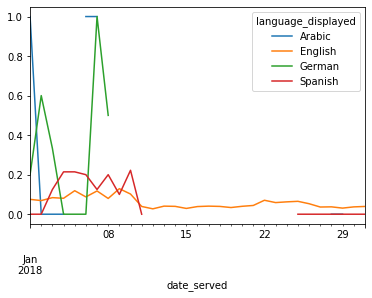

In [75]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']


# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

conv_lang_df.plot()

### 6b. We have to check to see why there is a decrease in conversion rate for channe: House Ads

- Hypothesis: Because language display is not language preferred

In [76]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'], 'Yes', 'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/Users/lytran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,0.984429
2018-01-02,3.0,247.0,0.984111
2018-01-03,0.0,220.0,0.995475
2018-01-04,0.0,168.0,0.994083
2018-01-05,0.0,160.0,0.993789


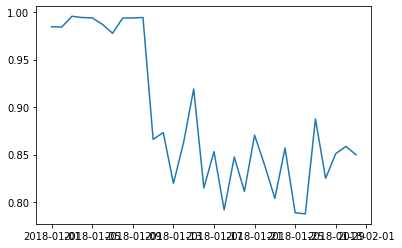

In [78]:
### let's calculate what percentage of users were not being served ads in the right language and plot your results.

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)
language_check_df.head(5)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

### 6c. Plot above indicates that the issue with House Ads conversion comes from language ( because % of language displayed correctly is low). So, we want to know how mnay subscribers we lost as a result of this bug

In [84]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

print(house_ads_bug.head(1))
print("-"*50)
print(lang_conv)

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("-"*50)

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred   age_group date_subscribed  \
0            English            English  0-18 years      2018-01-01   

  date_canceled subscribing_channel is_retained  DoW is_correct_lang  
0           NaT           House Ads        True  0.0             Yes  
--------------------------------------------------
language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64
--------------------------------------------------
Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [85]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [113]:
converted_period = converted.loc['2018-01-11':'2018-01-31'].reset_index()
converted_period = converted_period[converted_period['language_preferred']=='English']

In [111]:
converted_period[converted_period['language_preferred']=='English']

,date_served,language_preferred,user_id,converted
1,2018-01-11,English,133,6
5,2018-01-12,English,129,3
9,2018-01-13,English,121,5
13,2018-01-14,English,131,6
17,2018-01-15,English,189,6
21,2018-01-16,English,127,6
25,2018-01-17,English,126,2
29,2018-01-18,English,121,5
33,2018-01-19,English,126,4
37,2018-01-20,English,124,4


### Table of Contents

* [Chapter 1](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$